# k-means
### Dataset: [A3-data.txt](../../input/A3-data.txt)

<a id="1"></a>
## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'plotly'

<a id="2"></a>
## Loading dataset

In [ ]:
filename = '../../input/A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

features = ['x', 'y', 'z', 't']
target = ['class']

X = df[features]

print(X.describe())

y = df[target]


            x         y         z         t  class
0   -0.031676 -9.912054 -0.579436 -1.044239      1
1    0.002526  6.172456  3.288339 -1.006427      5
2    0.183123 -0.387841  6.236470 -1.691491      2
3   -0.042262 -1.996272 -1.655302 -2.995311      1
4   -0.062811 -0.417072  6.657475 -3.633134      4
..        ...       ...       ...       ...    ...
355 -0.340733  8.504536  7.903644 -2.032197      6
356 -0.024928  1.551977  6.361992 -0.757714      2
357 -0.668529 -0.607597  0.639295  4.329213      6
358 -0.122711 -5.516957 -2.111173  2.209675      3
359  0.740207 -7.492176  1.959426 -7.119918      6

[360 rows x 5 columns]
                x           y           z           t
count  360.000000  360.000000  360.000000  360.000000
mean     0.030880    0.685121    3.973543   -0.318865
std      0.377520    4.900030    4.050409    3.321348
min     -0.819698   -9.912054   -4.573732   -7.954909
25%     -0.140746   -2.033918    0.610788   -2.694196
50%      0.002011    0.214840    4.98897

<a id="3"></a>
## Standardize the data

In [ ]:
# standardizing the features
X_norm = StandardScaler().fit_transform(X)

print(X_norm)

[[-0.16593253 -2.16568552 -1.12564329 -0.21870125]
 [-0.0752113   1.12141602 -0.16940458 -0.20730108]
 [ 0.4038321  -0.2192752   0.55946837 -0.41384888]
 ...
 [-1.85521782 -0.26418564 -0.82433373  1.40140325]
 [-0.4074083  -1.26748402 -1.5043379   0.7623589 ]
 [ 1.88152582 -1.67114864 -0.49795468 -2.05052832]]


<a id="4"></a>
## Get the K value

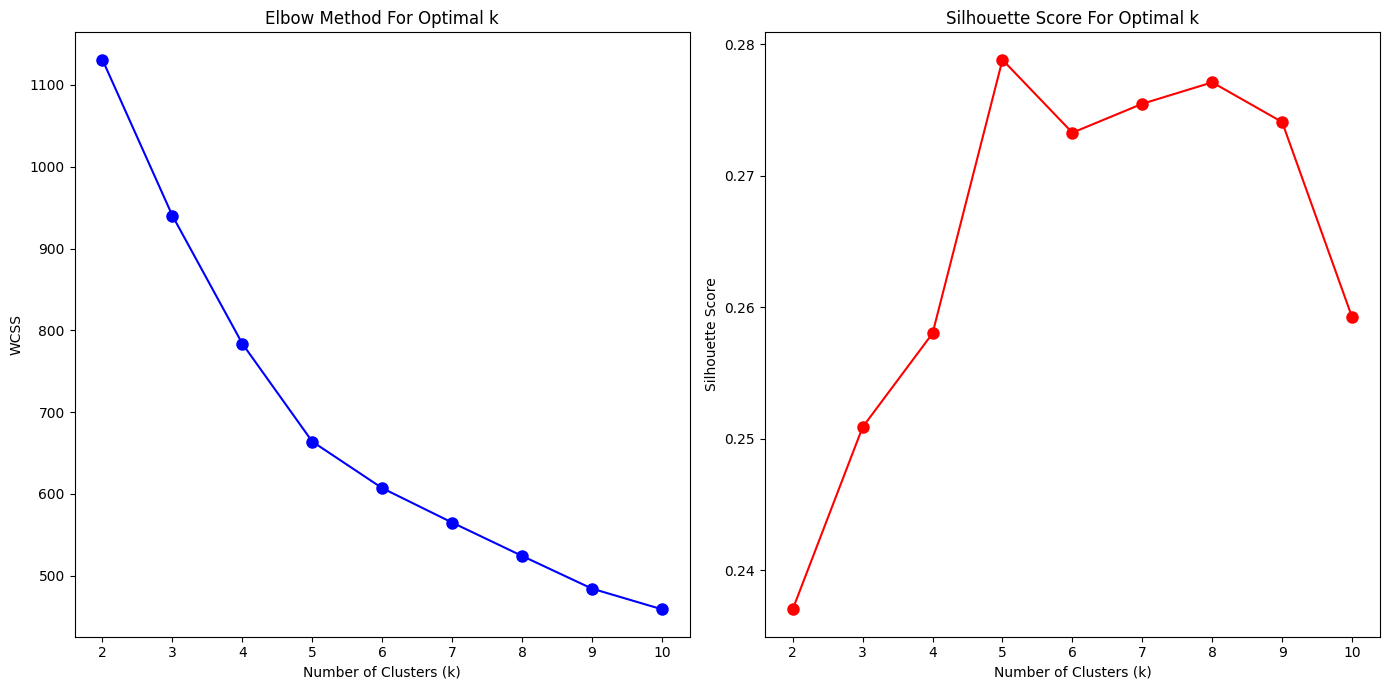

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

range_n_clusters = range(2, 11)  
wcss = []
silhouette_avg = []

for n_clusters in range_n_clusters:
    # explicitly setting the n_init parameter to avoid the warning
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(X_norm)
    
    # the silhouette_score gives the average value for all the samples.
    silhouette_avg.append(silhouette_score(X_norm, cluster_labels))
    
    # inertia: Sum of squared distances of samples to their closest cluster center
    wcss.append(clusterer.inertia_)


# plotting the Elbow Method graph
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wcss, 'bo-', markersize=8)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

# plotting the Silhouette Scores graph
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_avg, 'ro-', markersize=8)
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# based on these plots, choose the optimal k (5/6)


<a id="6"></a>
## Visualize 2D Projection

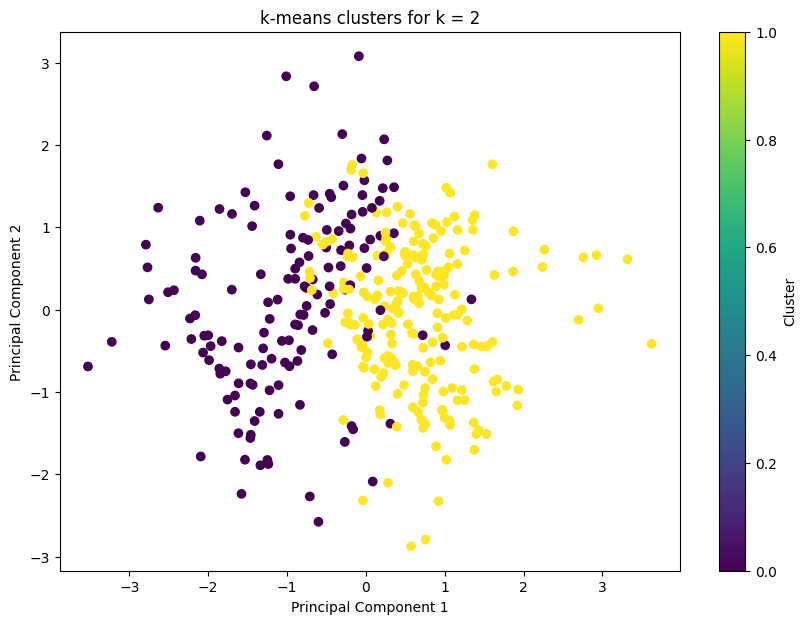

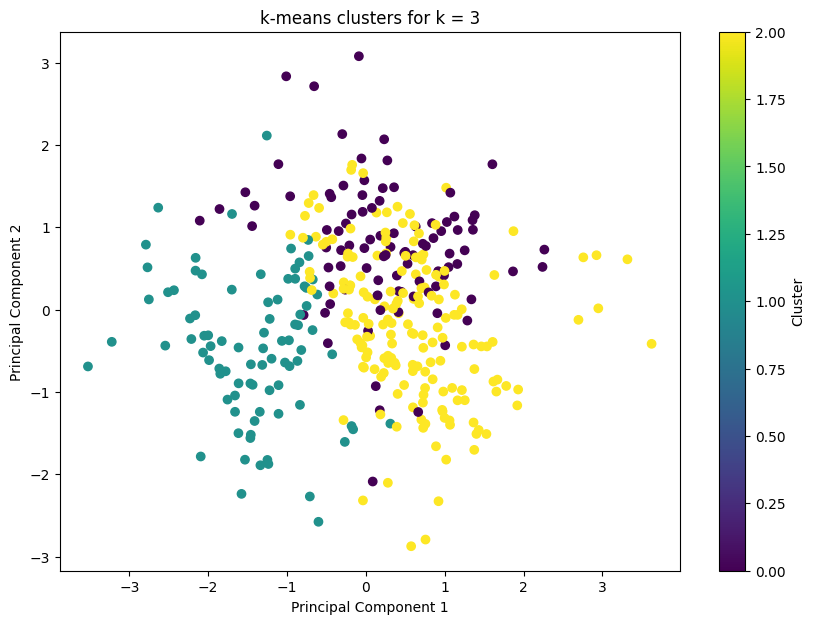

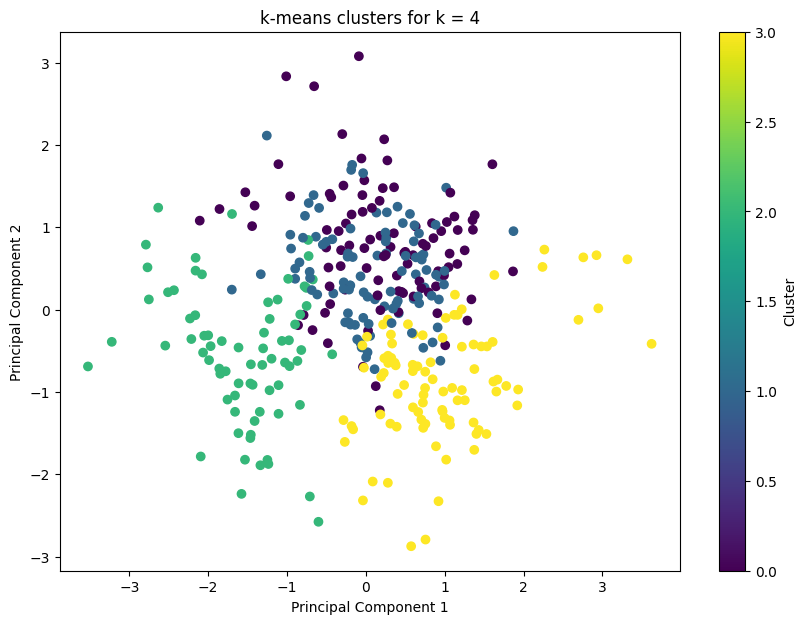

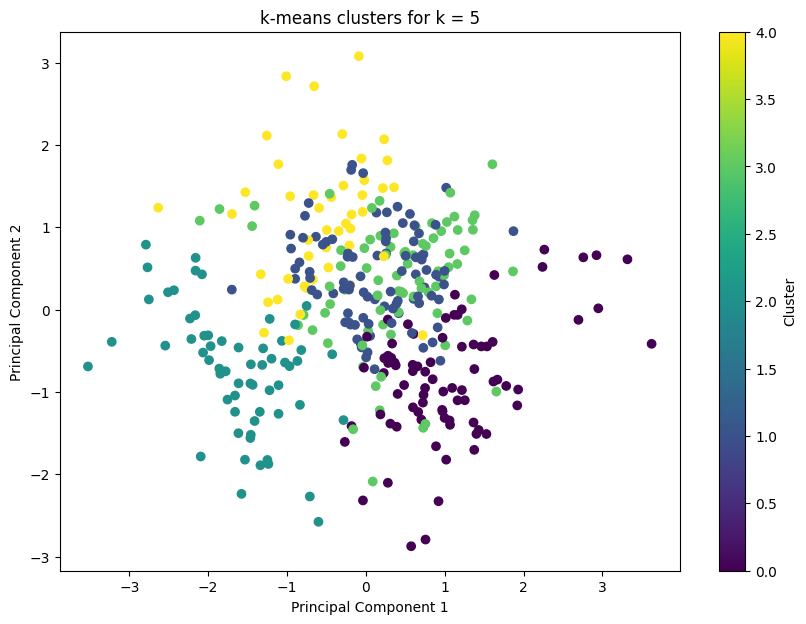

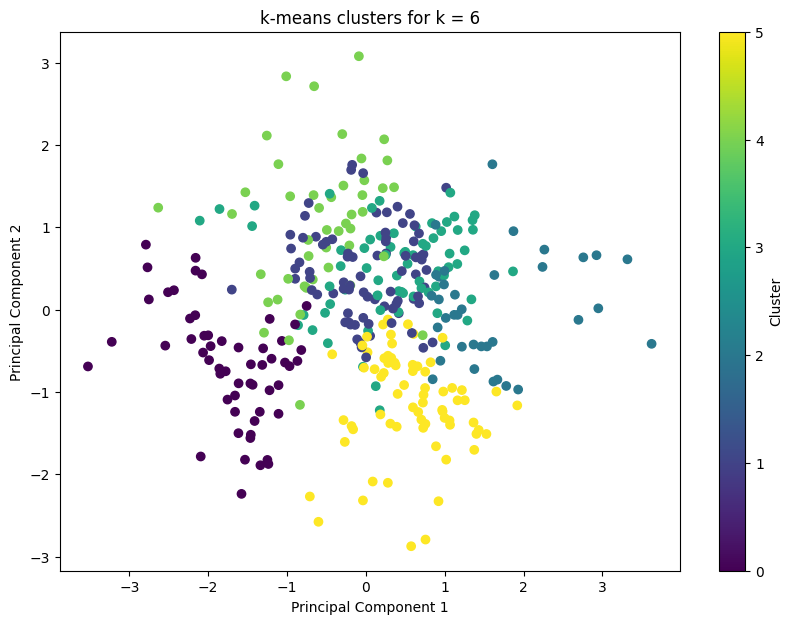

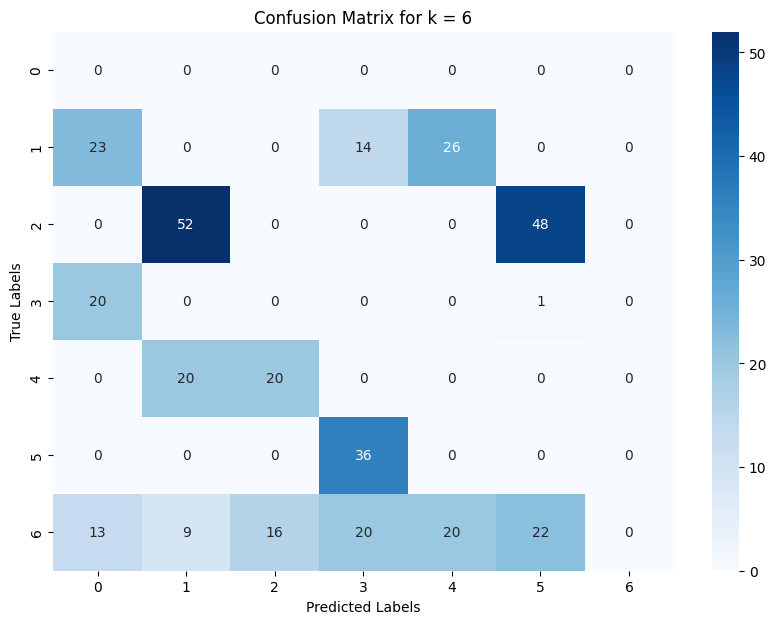

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_norm)

real_labels = y.values.flatten()  # 'y' is the DataFrame column with real class labels
n_real_classes = np.unique(real_labels).size

# apply k-means for k = 2, 3, ..., 5 and plot
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_norm)  # use X_norm for fitting

    # plot the k-means clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title(f'k-means clusters for k = {k}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()
    
    # if k equals the real number of classes, compute the confusion matrix
    if k == n_real_classes:
        # building the confusion matrix
        cm = confusion_matrix(real_labels, kmeans_labels)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for k = {k}')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()
